# Проект "Анализ результатов А/В теста".

**Описание проекта:**<br>
Вместе с отделом маркетинга крупного интернет-магазина мы подготовили список гипотез для увеличения выручки.
Нужно приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

**Этапы проекта:** <br>1. Приоритизация гипотез, <br>2. Анализ А/В-теста. <br>


### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета:

In [1]:
import pandas as pd # подгружаем библиотеки
import os
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
pth1 = '\Downloads\hypothesis.csv'
pth2 = '/datasets/hypothesis.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1, sep=',')
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, sep=',')
else:
    print('Something is wrong')
    
data['ICE'] = round(data['Impact'] * data['Confidence'] / data['Efforts'],2)
display (data[['Hypothesis' , 'ICE']].sort_values(by = 'ICE', ascending = False))


,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета:

In [3]:
data['RICE'] = data['Reach']*data['Impact'] * data['Confidence'] / data['Efforts']
display (data[['Hypothesis' , 'RICE']].sort_values(by = 'RICE', ascending = False))

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


**Из расчётов видно, что порядок приоритизации сильно зависит от выбора метода. Так, при выборе метода ICE самой приоритетной выглядит гипотеза №8, однако если использовать методе RICE, то эта гипотеза сместится на пятое место из девяти. Кроме того, можно заметить, что значения ICE и RICE для гипотезы 8 одинаковы, что говорит о том, что охват этой гипотезы равен единице (по 10-балльной шкале). ICE и RICE различаются между собой одним множителем "Reach", который учитывает охват, то есть фреймворк RICE даёт более полное представление. Таким образом, более приоритетной выглядит гипотеза 7.**

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения:

In [4]:
pth3 = '\Downloads\orders.csv' # загружаем файлы
pth4 = '/datasets/orders.csv'
pth5 = '\Downloads\visitors.csv'
pth6 = '/datasets/visitors.csv'

if os.path.exists(pth3):
    orders = pd.read_csv(pth3, sep=',')
elif os.path.exists(pth4):
    orders = pd.read_csv(pth4, sep=',')
else:
    print('Something is wrong')
    
if os.path.exists(pth5):
    visitors = pd.read_csv(pth5, sep=',')
elif os.path.exists(pth6):
    visitors = pd.read_csv(pth6, sep=',')
else:
    print('Something is wrong')    
 
orders.info() # смотрим информацию о файлах
visitors.info()

print ('Количество дублей в orders:',orders.duplicated().sum())
print('Количество дублей в visitors:',visitors.duplicated().sum())

orders['date'] = pd.to_datetime(orders['date']) #меняем тип данных полей с датами
visitors['date'] = pd.to_datetime(visitors['date'])

orders.groupby('group').agg({ # смотрим количество групп, границы дат и размер групп
            'date': ['min','max'],
            'visitorId': 'nunique',
                    })

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
Количество дублей в orders: 0
Количество дублей в visitors: 0


date            visitorId
             min        max   nunique
group                                
A     2019-08-01 2019-08-31       503
B     2019-08-01 2019-08-31       586

**Пропусков и дублей в данных нет, типы дат преобразованы, диапазон дат найден, групп две, есть различие в количестве уникальных посетителей в группах примерно на 17%** 

**Теперь посмотрим, не входят ли пользователи одновлеменно в обе группы:**

In [5]:
both_groups = orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1')
print (len(both_groups))

58


**Удалим строки с visitorID, который встречается в обеих группах, чтобы они не искажали и не размывали основную картину:**

In [6]:
orders = orders[~orders.visitorId.isin(both_groups.index)]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


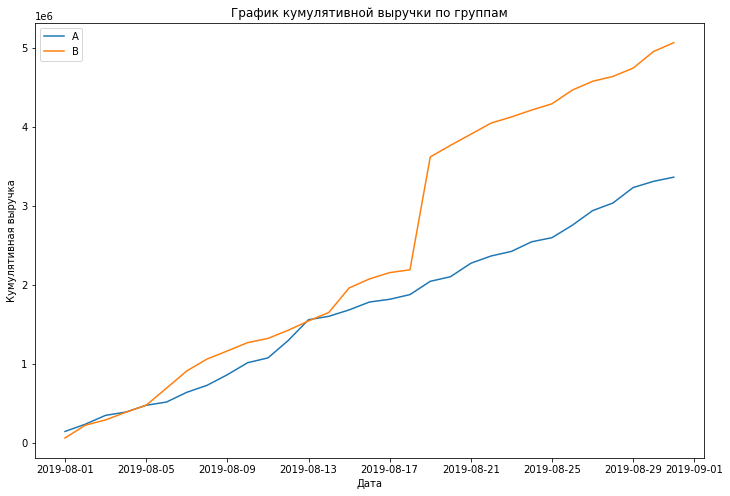

In [7]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(12,8))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title("График кумулятивной выручки по группам")
plt.xlabel("Дата")
plt.ylabel("Кумулятивная выручка")
plt.legend() 
plt.show()

**Выручка в обеих группах растёт равномерно увеличивается, при этом у группы В наблюдается скачок. Это может быть вызвано крупным заказом.**

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения:

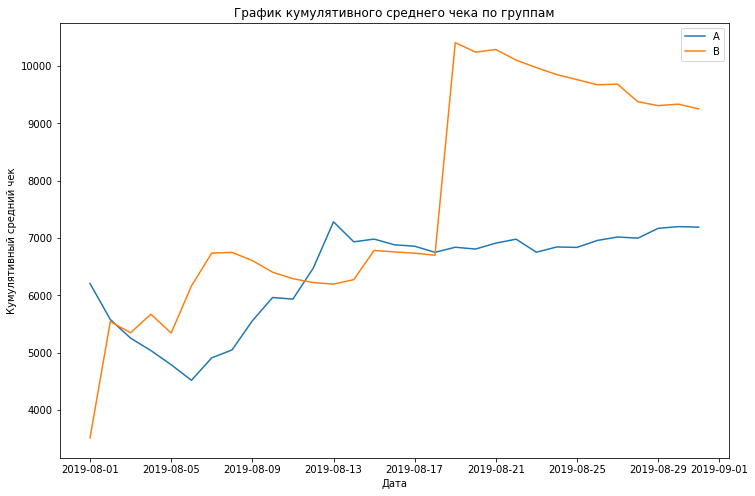

In [8]:
plt.figure(figsize=(12,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title("График кумулятивного среднего чека по группам")
plt.xlabel("Дата")
plt.ylabel("Кумулятивный средний чек")
plt.legend() 
plt.show()


**В начала видны резкие всплески и даже пересечения на графике, далее наблюдается резкий всплеск у группы В, и после этого средний чек становится выше.**

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A:

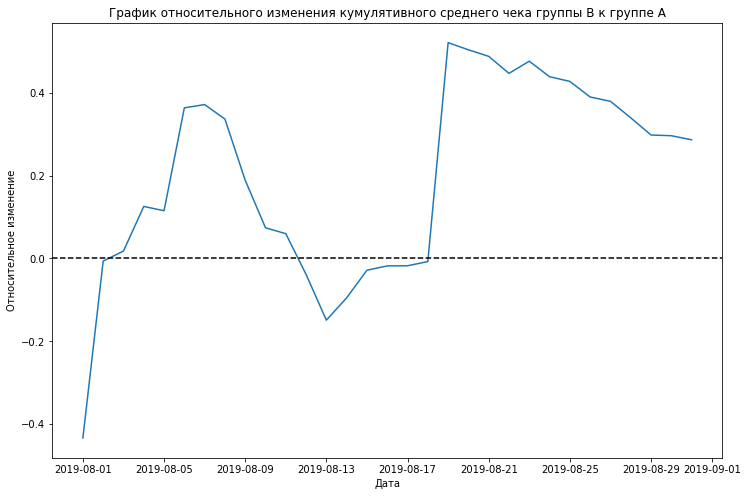

In [9]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,8))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.xlabel("Дата")
plt.ylabel('Относительное изменение')
plt.show()

**График имеет резкий скачок, что может говорить о крупном заказе и/или выбросе. Если убрать этот скачок, то график будет колебаться вокруг нуля.**

### Построим график кумулятивного среднего количества заказов на посетителя по группам:

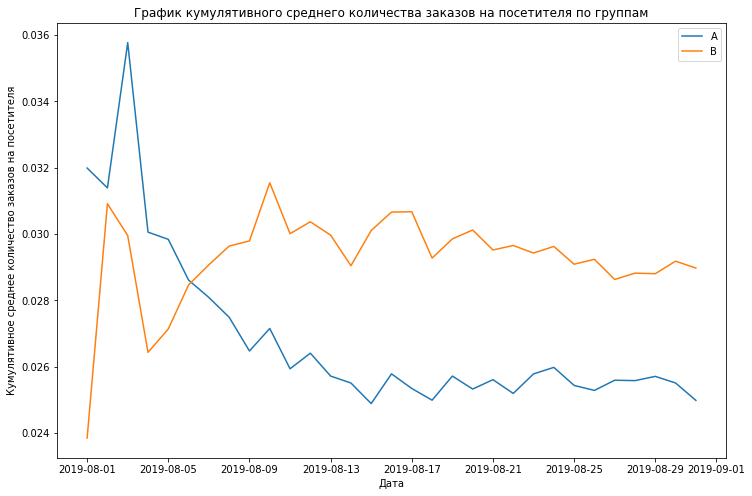

In [10]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title("График кумулятивного среднего количества заказов на посетителя по группам")
plt.xlabel("Дата")
plt.ylabel("Кумулятивное среднее количество заказов на посетителя")
plt.show()

**Из графиков видно, что начиная с 6 го дня кумулятивное среднее количество заказов на посетителя по группе В стабильно выше аналогичного по группе А.**

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:

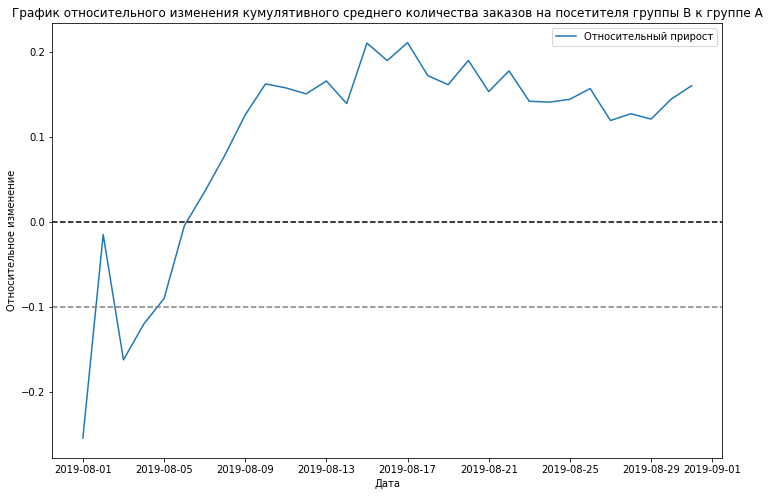

In [11]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост")
plt.legend()
plt.title("График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.xlabel("Дата")
plt.ylabel('Относительное изменение')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.show()

**Из графика видно, что, начиная с 6 го дня относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A стабильно выше нуля.**

### Построим точечный график количества заказов по пользователям:

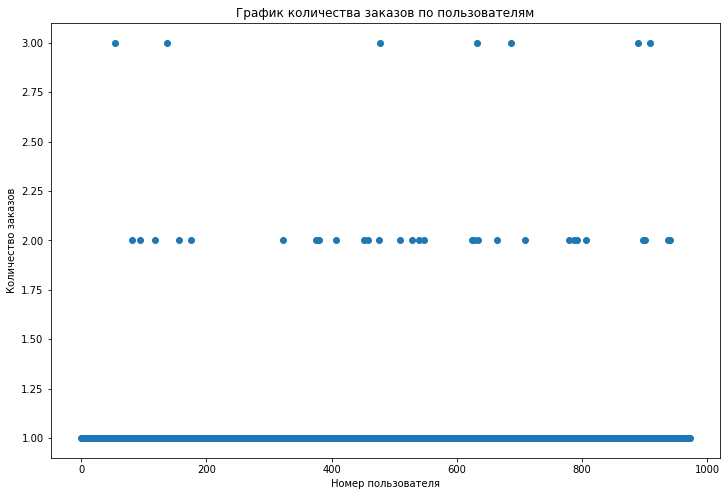

In [12]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'transactions']
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(12,8))
plt.scatter(x_values, ordersByUsers['transactions']) 
plt.title("График количества заказов по пользователям")
plt.ylabel("Количество заказов")
plt.xlabel('Номер пользователя')
plt.show()

**Большинство пользователей совершили по одному заказу, но и 2 заказа на человека тоже не редкость, и только единицы совершили более 3 заказа.**

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя:

In [13]:
print(np.percentile(ordersByUsers['transactions'], [95, 99])) 

[1. 2.]


**5 % пользователей сделали больше, чем 1 заказ, и только 1% сделали больше 2 заказов. Возьмём в качестве границы нормы 2 заказа, а всё, что больше, будем считать аномалиями.**

### Построим точечный график стоимостей заказов:

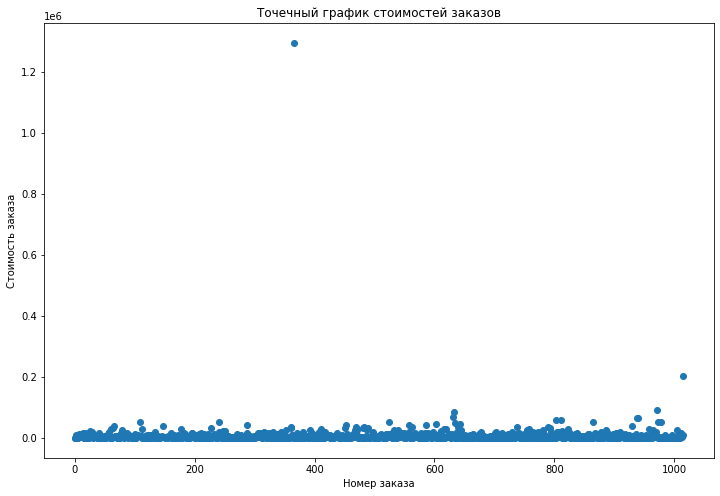

In [14]:
plt.figure(figsize=(12,8))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title("Tочечный график стоимостей заказов")
plt.ylabel("Стоимость заказа")
plt.xlabel('Номер заказа')
plt.show()

**На графике видны 2 выброса.**

**Выведем точечный график стоимостей заказов без выбросов (со стоимостью ниже 100000):**

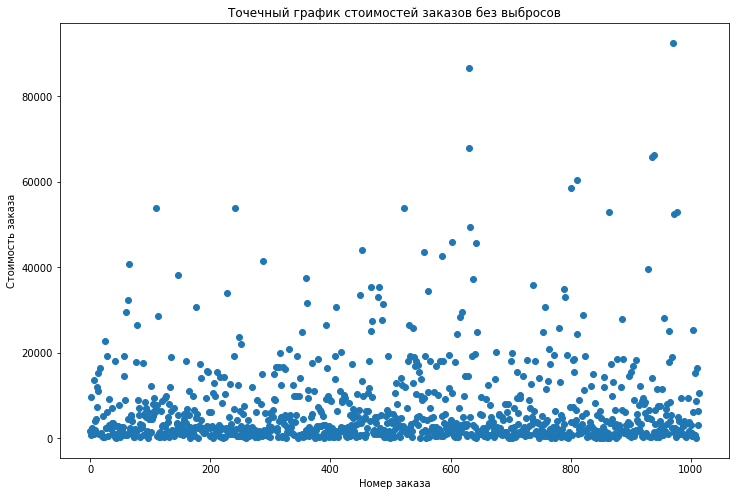

In [15]:
orders_normal=orders[orders['revenue']<100000]
plt.figure(figsize=(12,8))
x_values = pd.Series(range(0,len(orders_normal['revenue'])))
plt.scatter(x_values, orders_normal['revenue']) 
plt.title("Tочечный график стоимостей заказов без выбросов")
plt.ylabel("Стоимость заказа")
plt.xlabel("Номер заказа")
plt.show()

### Посчитаем 95-й и 99-й перцентили стоимости заказов:

In [16]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


**5 % заказов имеют стоимость более 26785, и 1% заказов имеет стоимость более 53904 . Возьмём в качестве границы нормы 53904, а всё, что больше, будем считать аномалиями.**

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным:

**Сформулируем гипотезы. Нулевая гипотеза: различий в среднем количестве заказов на посетителя между группами нет. Альтернативная гипотеза : различия в среднем количестве заказов на посетителя между группами есть.**

**Для оценки статичтической значимости будем использовать критерий Манна-Уитни, который является непараметрическим методом, так как он работает с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. Выбор этого критерия обусловлен желанием исключить влияние выбросов, сильно сдвигающих параметрические результаты.**

In [17]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

In [18]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [19]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [20]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value =',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('относительная разница =',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.011
относительная разница = 0.160


**Вывод: По «сырым» данным есть различие в среднем количестве заказов на посетителя между группами A и B.  p-value = 0.011, это меньше 0,05, поэтому нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов на посетителя между группами A и B нет, отвергаем.
Относительный выигрыш группы B равен 16.0%.**

### Посчитайте статистическую значимость различий в среднем чеке заказа:

In [21]:
print('p-value =','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('относительная разница =','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.829
относительная разница = 0.287


**Вывод: P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.**

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

**Примем за аномальных пользователей тех, кто совершил больше 2 заказов или совершил заказ дороже 58233.2. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 58233.2 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.**

**Узнаем, сколько всего аномальных пользователей атрибутом shape:**

In [22]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['transactions'], 99)]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['transactions'], 99)]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers)
print('Абсолютные потери пользователей после фильтрации:', abnormalUsers.shape[0])
print ('Относительные потери пользователей после фильтрации:','{0:.2f}'.format(abnormalUsers.shape[0]/len(orders['visitorId'].unique())*100),'%')

1099     148427295
33       249864742
58       611059232
949      887908475
744      888512513
1103    1164614297
1136    1307669133
425     1920142716
1196    2108080724
211     2108163459
347     2742574263
310     2988190573
409     3908431265
416     3967698036
940     4003628586
743     4133034833
Name: visitorId, dtype: int64
Абсолютные потери пользователей после фильтрации: 16
Относительные потери пользователей после фильтрации: 1.64 %


**Подготовим выборки количества заказов по пользователям по группам теста:**


In [23]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

**Применим статистический критерий Манна-Уитни к полученным выборкам:**

In [24]:
print('p-value =','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительная разница =','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.007
относительная разница = 0.189


**Вывод: По «очищенным» данным есть различие в среднем числе заказов на посетителя между группами A и B.  p-value = 0.006, это меньше 0,05, поэтому нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов на посетителя между группами нет, отвергаем.
Относительный выигрыш группы B равен 20,2%.**

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным:

In [25]:
print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "относительная разница = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value = 0.788
относительная разница = -0.032


**Вывод: P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек практически не изменился.**

### Решение по результатам теста:

1.  Есть статистически значимое различие по среднему количеству заказов на посетителя между группами А и В как по «сырым», так и по данным после фильтрации аномалий;
2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
3. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A сообщает, что результаты группы B лучше группы A в части кумулятивного среднего количества заказов.

**Исходя из обнаруженных фактов, считаю, что тест нужно остановить и зафиксировать победу одной группы В, так как в указанной группе среднее количество заказов на посетителя больше аналогичного в группе А примерно на 15% при том же среднем чеке.**